# Convolutional Neural Network (using Keras)

In [0]:
#importing the required libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import optimizers
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense,Conv2D, Flatten
from keras.layers.convolutional import MaxPooling2D
from sklearn.model_selection import train_test_split

In [0]:
#Importing the data
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [0]:
#to make the Y data to list from vector
Y_train=Y_train.reshape(-1,1)
X_train=X_train.reshape(60000,784)
#to make the test data to 784 columns from 28*28
X_test=X_test.reshape(-1,784)
Y_test=Y_test.reshape(-1,1)

In [0]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.50, random_state=100) #splitting the Test data according to Validate and Test

In [20]:
Y_train=Y_train.reshape(-1,1)
Y_train.shape

(60000, 1)

In [21]:
Y_test=Y_test.reshape(-1,1)
Y_test.shape

(5000, 1)

In [0]:
#to make the data of y_set onehot -flattening in 10 columns and mapping the class value with index of columns as 1 and rest of it as zero
def onehotscratch(Y_train):
    y_hotenc=np.zeros((Y_train.shape[0],10))
    for i in range(Y_train.shape[0]):
        value=Y_train[i][0]
        y_hotenc[i][value]=1
    return y_hotenc

In [0]:
Y_hotenc_train=onehotscratch(Y_train)
Y_hotenc_test=onehotscratch(Y_test)
Y_hotenc_val=onehotscratch(Y_val)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [0]:
# define the CNN model
def make_model(X_train,Y_hotenc_train,value):
  model_CNN = Sequential()
  model_CNN.add(Conv2D(100, kernel_size = 2, activation = 'sigmoid', input_shape = (28, 28, 1)))
  model_CNN.add(MaxPooling2D())
  model_CNN.add(Conv2D(100, kernel_size = 2, activation = 'relu'))
  model_CNN.add(MaxPooling2D())
  model_CNN.add(Flatten())
  model_CNN.add(Dense(units = 10, activation = 'softmax'))
  # compile the CNN model
  model_CNN.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
  # fit the CNN model on the dataset
  Final_model=model_CNN.fit(X_train, Y_hotenc_train, epochs=value, batch_size=1000)
  return Final_model,model_CNN

Epoch 1/3
60000/60000 [==============================] - 107s 2ms/step - loss: 1.3939 - acc: 0.5632
Epoch 2/3
60000/60000 [==============================] - 106s 2ms/step - loss: 0.8249 - acc: 0.7186
Epoch 3/3
60000/60000 [==============================] - 105s 2ms/step - loss: 0.6909 - acc: 0.7495
Epoch 1/3
5000/5000 [==============================] - 9s 2ms/step - loss: 2.1473 - acc: 0.2482
Epoch 2/3
5000/5000 [==============================] - 9s 2ms/step - loss: 1.9185 - acc: 0.4498
Epoch 3/3
60000/60000 [==============================] - 35s 580us/step
Accuracy with training data 
 75.78166666666667 %


5000/5000 [==============================] - 3s 603us/step
Accuracy with validation data 
 62.739999999999995 %




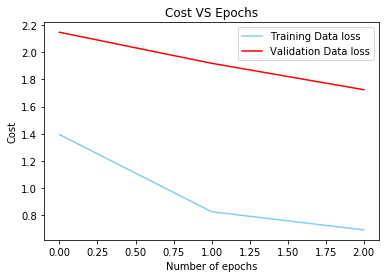

In [27]:
## Hyper Paramters as Epoch =3
#Training Data
Final_model_train1,model_CNN_train1=make_model(X_train,Y_hotenc_train,3)
#Validation Data
Final_model_val1,model_CNN_val1=make_model(X_val,Y_hotenc_val,3)

#Checking accuracy and Cost vs Epochs
_, accuracy_train1 = model_CNN_train1.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data \n",accuracy_train1*100,"%\n\n")
_, accuracy_val1 = model_CNN_val1.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data \n",accuracy_val1*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_train1.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val1.history['loss'],color='red',label = "Validation Data loss")
plt.legend()

Epoch 1/8
60000/60000 [==============================] - 105s 2ms/step - loss: 1.4347 - acc: 0.5810
Epoch 2/8
60000/60000 [==============================] - 106s 2ms/step - loss: 0.8448 - acc: 0.7171
Epoch 3/8
60000/60000 [==============================] - 106s 2ms/step - loss: 0.7116 - acc: 0.7421
Epoch 4/8
60000/60000 [==============================] - 105s 2ms/step - loss: 0.6482 - acc: 0.7576
Epoch 5/8
60000/60000 [==============================] - 104s 2ms/step - loss: 0.6037 - acc: 0.7750
Epoch 6/8
60000/60000 [==============================] - 105s 2ms/step - loss: 0.5689 - acc: 0.7872
Epoch 7/8
60000/60000 [==============================] - 106s 2ms/step - loss: 0.5456 - acc: 0.7959
Epoch 8/8
60000/60000 [==============================] - 106s 2ms/step - loss: 0.5309 - acc: 0.8020
Epoch 1/8
5000/5000 [==============================] - 9s 2ms/step - loss: 2.2302 - acc: 0.1730
Epoch 2/8
5000/5000 [==============================] - 9s 2ms/step - loss: 1.9310 - acc: 0.3822
Epoch 3/

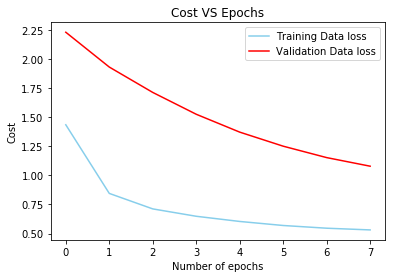

In [28]:
## Hyper Paramters as Epoch =8
Final_model_train2,model_CNN_train2=make_model(X_train,Y_hotenc_train,8)
#Validation Data
Final_model_val2,model_CNN_val2=make_model(X_val,Y_hotenc_val,8)

#Checking accuracy and Cost vs Epochs
_, accuracy_train2 = model_CNN_train2.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data \n",accuracy_train2*100,"%\n\n")
_, accuracy_val2 = model_CNN_val2.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data \n",accuracy_val2*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_train2.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val2.history['loss'],color='red',label = "Validation Data loss")
plt.legend()

Epoch 1/10
60000/60000 [==============================] - 105s 2ms/step - loss: 1.3924 - acc: 0.6072
Epoch 2/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.8074 - acc: 0.7259
Epoch 3/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.6821 - acc: 0.7549
Epoch 4/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.6327 - acc: 0.7672
Epoch 5/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.5841 - acc: 0.7802
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.5589 - acc: 0.7906
Epoch 7/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.5382 - acc: 0.7982
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.5170 - acc: 0.8078
Epoch 9/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.4949 - acc: 0.8176
Epoch 10/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.4875 - a

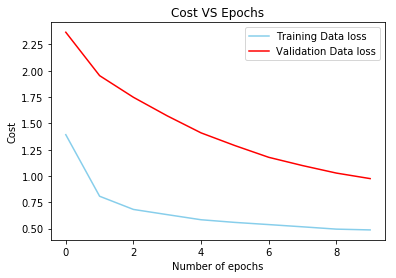

In [29]:
## Hyper Paramters as Epoch =10
#Training Data
Final_model_train3,model_CNN_train3=make_model(X_train,Y_hotenc_train,10)
#Validation Data
Final_model_val3,model_CNN_val3=make_model(X_val,Y_hotenc_val,10)

#Checking accuracy and Cost vs Epochs
_, accuracy_train3 = model_CNN_train3.evaluate(X_train, Y_hotenc_train)
print("Accuracy with training data \n",accuracy_train3*100,"%\n\n")
_, accuracy_val3 = model_CNN_val3.evaluate(X_val, Y_hotenc_val)
print("Accuracy with validation data \n",accuracy_val3*100,"%\n\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(Final_model_train3.history['loss'],color='skyblue',label = "Training Data loss")
plt.plot(Final_model_val3.history['loss'],color='red',label = "Validation Data loss")
plt.legend()

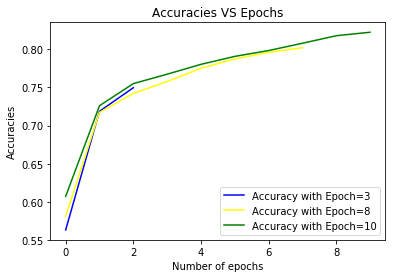

In [37]:
plt.title('Accuracies VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracies')
plt.plot(Final_model_train1.history['acc'],color='blue',label = "Accuracy with Epoch=3")
plt.plot(Final_model_train2.history['acc'],color='yellow',label = "Accuracy with Epoch=8")
plt.plot(Final_model_train3.history['acc'],color='green',label = "Accuracy with Epoch=10")
plt.legend()

In [32]:
# evaluating CNN model
_, accuracy = model_CNN_train3.evaluate(X_test, Y_hotenc_test)
print("Accuracy with test data :\n",accuracy*100,"%")


5000/5000 [==============================] - 3s 666us/step
Accuracy with test data :
 82.56 %


In [33]:
confusion_matrix(Y_test,model_CNN_train3.predict_classes(X_test))

array([[408,   0,  15,  38,   2,   0,  23,   0,  11,   0],
       [  2, 457,   2,  24,   6,   0,   2,   0,   0,   0],
       [  4,   0, 399,   5,  62,   0,  26,   0,   3,   0],
       [ 10,   9,  10, 433,  18,   0,   9,   0,   1,   0],
       [  0,   2,  69,  19, 377,   1,  25,   0,   2,   0],
       [  0,   0,   0,   2,   0, 426,   0,  33,   3,  13],
       [101,   2,  95,  25,  76,   1, 190,   0,  19,   0],
       [  0,   0,   0,   0,   0,  17,   0, 469,   0,  26],
       [  0,   0,   8,   5,   3,   5,   5,   2, 462,   1],
       [  0,   0,   0,   0,   0,   4,   1,  24,   1, 507]])

In [35]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(Y_test, model_CNN_train3.predict_classes(X_test),target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.82      0.80       497
     class 1       0.97      0.93      0.95       493
     class 2       0.67      0.80      0.73       499
     class 3       0.79      0.88      0.83       490
     class 4       0.69      0.76      0.73       495
     class 5       0.94      0.89      0.92       477
     class 6       0.68      0.37      0.48       509
     class 7       0.89      0.92      0.90       512
     class 8       0.92      0.94      0.93       491
     class 9       0.93      0.94      0.94       537

    accuracy                           0.83      5000
   macro avg       0.82      0.83      0.82      5000
weighted avg       0.82      0.83      0.82      5000

